# Water age in the Terminos lagoon. Mexico

 Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, 
 
Lalo
Marisol
María- Eugenia Allende-Arandía 
Carlos 
 
 Joan Albert Sanchez-Cabeza<sup>3</sup>,
 
Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> ,



<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México



 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)

## This script plots salinity and temperature data and models the variation in Terminos Lagoon, Mexico.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gsw as gsw
import matplotlib.dates as mdates

In [2]:
# set up the plotting environment
def makePretryGraphs():
    plt.rcParams["xtick.labelsize"] = 18
    plt.rcParams["ytick.labelsize"] = 18
    sns.set_style("ticks")
    sns.despine(top=False, right=False)

In [3]:
# read in the csv file
def read_csv_file(filename):
    # read in the csv file
    df = pd.read_csv(filename, sep=",", header=0, decimal=".", encoding="utf-8") 
    return df

In [4]:
# read salinity and temperature data from csv file 
sal_temp_terminos_rivers_file = "..\data\salinity_temperature_climatological_year_terminos_lagoon.csv"



In [5]:
sal_temp_terminos_rivers_rawdata = read_csv_file(sal_temp_terminos_rivers_file)

In [6]:
# print the column names
for col in sal_temp_terminos_rivers_rawdata.columns:
    print(col)

Time_model
Salinity_psu_model
Temperature_C_model
Time _2016_data
Date_GMT_00
Conductivity_microsiemens_cm
Temp_C
Year_2016
Date_GMT_00.1
Conductivity_microsiemens_cm.1
Temp_C.1
Year_2017
Date_GMT_00.2
Conductivity_microsiemens_cm.2
Temp_C.2
Year_2018
Conductivity_microsiemens_cm_average
Conductivity_microsiemens_cm_std
Temp_C_average
Temp_C_std


In [7]:
# select the columns of interest
terminos_rivers_sal_temp = sal_temp_terminos_rivers_rawdata.copy()[
    [
        "Time_model",
        "Salinity_psu_model",
        "Temperature_C_model",
        "Conductivity_microsiemens_cm_average",
        "Temp_C_average",
    ]
]

In [8]:
# set time as index
terminos_rivers_sal_temp["Time_model"] = pd.to_datetime(
    terminos_rivers_sal_temp["Time_model"], format="%d/%m/%Y %H:%M"
    )

terminos_rivers_sal_temp = terminos_rivers_sal_temp.set_index(
    terminos_rivers_sal_temp["Time_model"]
    )

In [9]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [10]:
# %% Calculate salinity from hobo conductivity

terminos_rivers_sal_temp["sea_level_preasure"] = 0

terminos_rivers_sal_temp["salinity_psu"] = gsw.conversions.SP_from_C(
    terminos_rivers_sal_temp["Conductivity_microsiemens_cm_average"] / 1000,
    terminos_rivers_sal_temp["Temp_C_average"],
    terminos_rivers_sal_temp["sea_level_preasure"],
)

In [11]:
def plot_time_series(df, time, var1, var2, ylabel, filename, ax=None):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from datetime import datetime
    
    plt.figure(figsize=(20, 12))

    plt.plot_date(df[time], df[var1], "*", color="#440154")
    plt.plot_date(df[time], df[var2], ".", color="#5ec962")

    # Set x-axis limits to January and December of the year in your data
    start_date = datetime(df[time].dt.year.iloc[0], 1, 1)  # January 1
    end_date = datetime(df[time].dt.year.iloc[0], 12, 31)  # December 31

    plt.xlim(start_date, end_date)
    plt.xticks(size=28)
    plt.yticks(size=28)
    plt.ylabel(ylabel, size=34)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    plt.rc("pdf", fonttype=42)
    plt.savefig(filename)
    

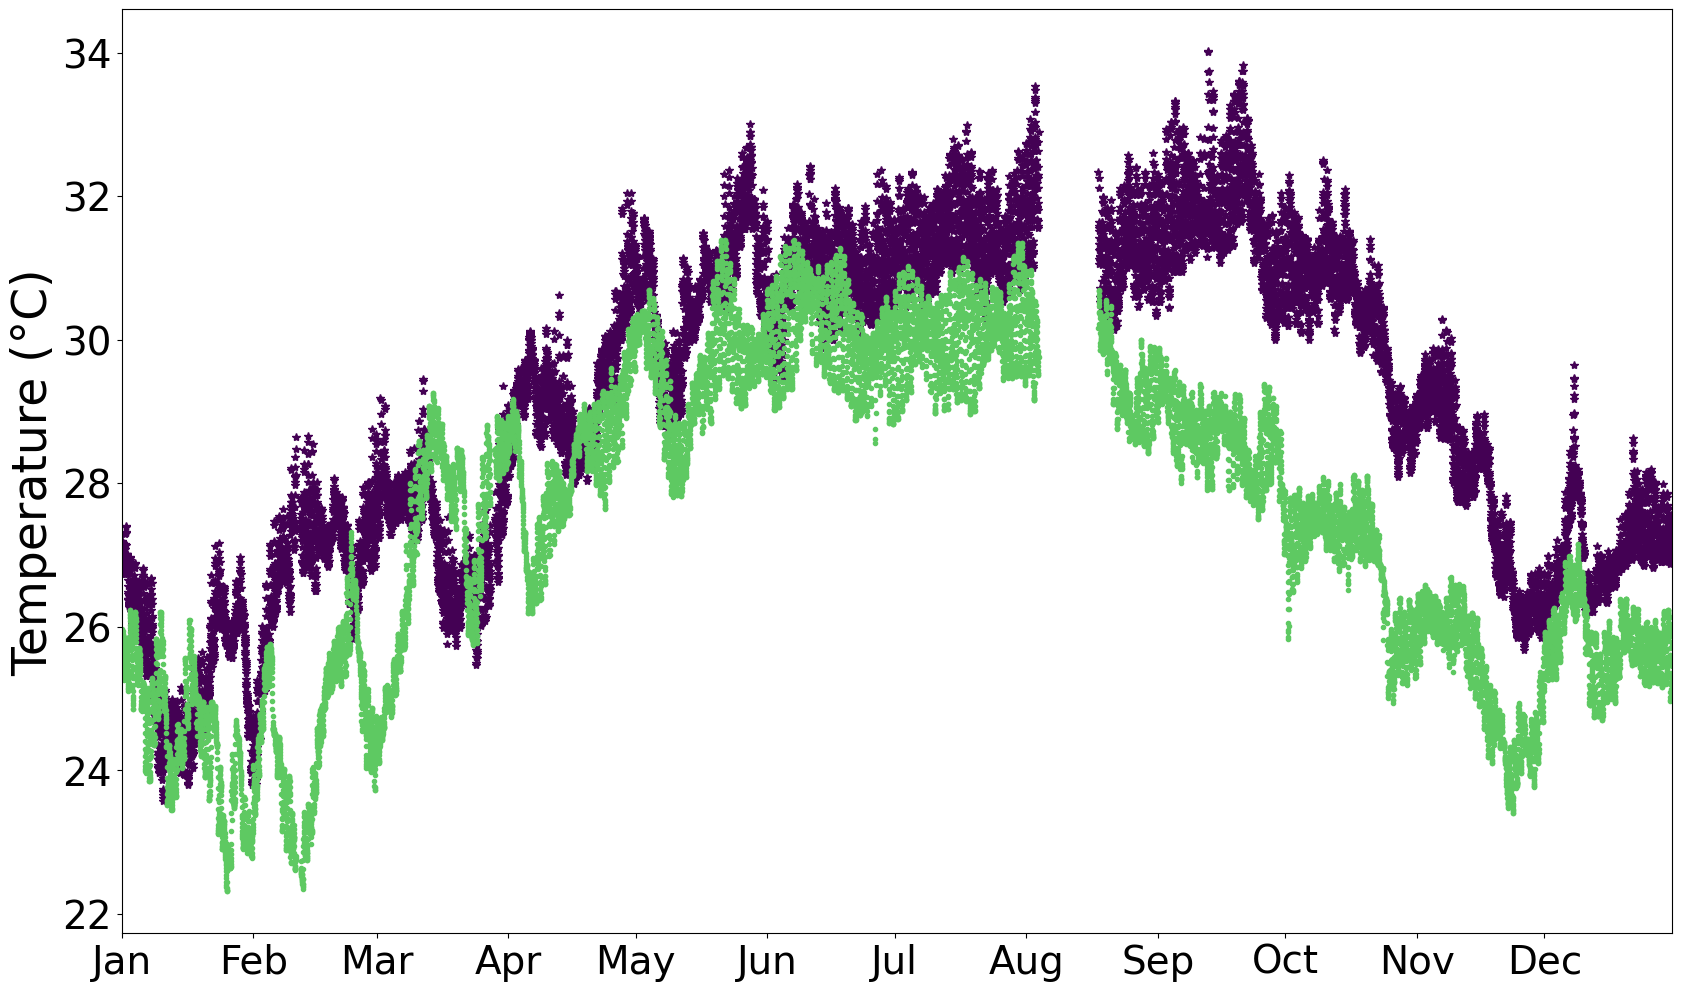

In [12]:
# Plot data field and temperature 
plot_time_series(terminos_rivers_sal_temp, 
                 "Time_model", 
                 "Temp_C_average", 
                 "Temperature_C_model", 
                 "Temperature (°C)",
                 "../outfiles/temperatureModelDataTerminos.pdf"
                 )

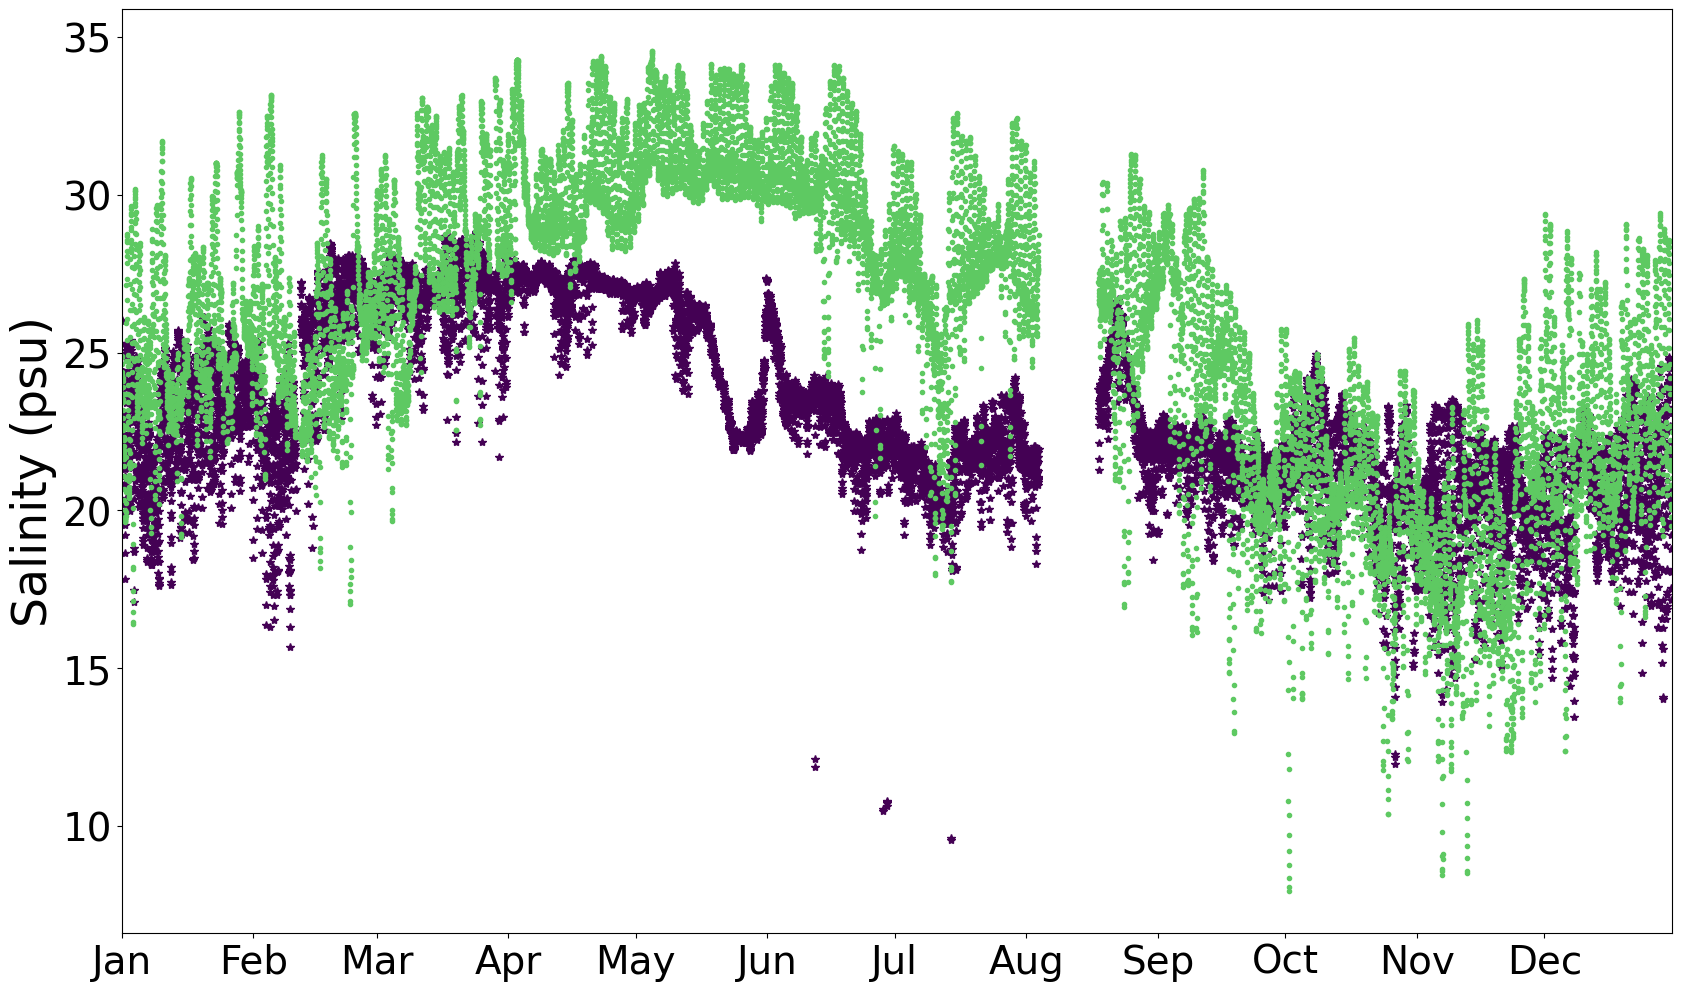

In [13]:
# Plot data field and model salinity
figure_temperature_Palizada_Candelaria = plot_time_series(terminos_rivers_sal_temp, 
                 "Time_model", 
                 "salinity_psu", 
                 "Salinity_psu_model", 
                 "Salinity (psu)",
                 "../outfiles/salinityModelDataTerminos.pdf"
                 )